# 生长包线

生长包线（又名表型相平面）将显示出不同的最佳生长阶段，使用两种不同的底物。有关详细信息，请参阅  [Edwards et al.](http://dx.doi.org/10.1002/bit.10047)

Cobrapy 支持计算这些Production envelopes，并且可以使用您喜欢的绘图包轻松绘制它们。在这里，我们将为“教科书”制作一个_E.coli_核心模型，并演示使用[matplotlib](http://matplotlib.org/).

In [1]:
from cobra.io import load_model
from cobra.flux_analysis import production_envelope

model = load_model("textbook")

我们想制作一个表型相平面来评估葡萄糖和氧气的摄取。

In [2]:
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])

In [3]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,1.750832e-14,NaN,-10.0,-60.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.072244,1.310050e+00,NaN,-10.0,-56.842105
2,EX_glc__D_e,0.0,0.0,NaN,0.144488,2.620100e+00,NaN,-10.0,-53.684211
3,EX_glc__D_e,0.0,0.0,NaN,0.216732,3.930150e+00,NaN,-10.0,-50.526316
4,EX_glc__D_e,0.0,0.0,NaN,0.288975,5.240200e+00,NaN,-10.0,-47.368421


如果我们指定碳源，我们也可以得到碳和质量产量。例如，暂时将目标设置为生产醋酸纤维，我们可以得到如下Production envelopes并且使用pandas来快速绘制结果。

In [4]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")

In [5]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,0.0,0.000000,5.340670e-16,5.251029e-16,-60.000000
1,EX_glc__D_e,0.0,0.0,0.0,1.578947,5.263158e-02,5.174819e-02,-56.842105
2,EX_glc__D_e,0.0,0.0,0.0,3.157895,1.052632e-01,1.034964e-01,-53.684211
3,EX_glc__D_e,0.0,0.0,0.0,4.736842,1.578947e-01,1.552446e-01,-50.526316
4,EX_glc__D_e,0.0,0.0,0.0,6.315789,2.105263e-01,2.069927e-01,-47.368421


In [6]:
%matplotlib inline

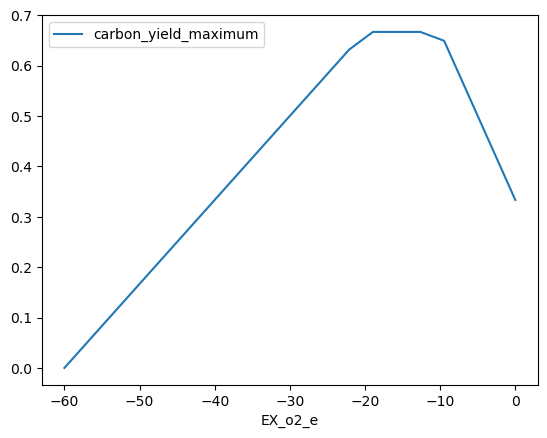

In [7]:
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

以前版本的 cobrapy 包括更多定制的相平面图，现在已被删除，以提高可维护性并增强 cobrapy 的焦点。cobra模型的绘图适用于另一个包。